In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [7]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
x_scaled=Scalar.fit_transform(x)

In [10]:
x_scaled.shape

(400, 2)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape

(320, 2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Applying the Stochastic Gradient Descent
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start=time.time()
history=model.fit(x_train,y_train,epochs=50,batch_size=1)
print(time.time()-start)


Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.3444
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.2931
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8403 - loss: 0.3478
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.2997
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8879 - loss: 0.2860
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8948 - loss: 0.2609
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8905 - loss: 0.2802
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8837 - loss: 0.3075
Epoch 9/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9240 - loss: 0.2312
Epoch 10/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8907 - loss: 0.2907
Epoch 11/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.2928
Epoch 12/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

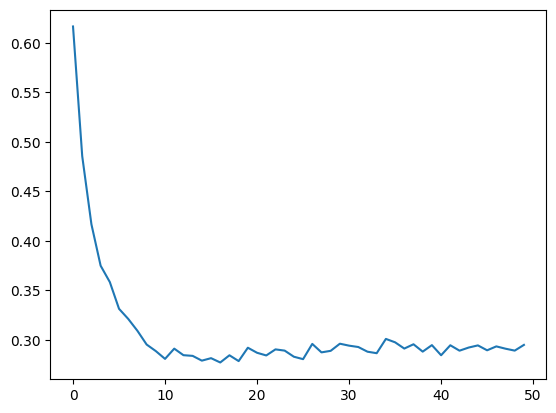

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [20]:
# Applying the batch_gredient_decent
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [25]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start=time.time()
model_history=model.fit(x_scaled,y,epochs=50,batch_size=250,validation_split=0.2)
print(time.time()-start)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.9068 - loss: 0.2980 - val_accuracy: 0.9875 - val_loss: 0.1092
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9082 - loss: 0.2846 - val_accuracy: 0.9875 - val_loss: 0.1121
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9169 - loss: 0.2704 - val_accuracy: 0.9875 - val_loss: 0.1148
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9062 - loss: 0.2944 - val_accuracy: 0.9875 - val_loss: 0.1158
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9156 - loss: 0.2686 - val_accuracy: 0.9875 - val_loss: 0.1177
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9103 - loss: 0.2806 - val_accuracy: 0.9875 - val_loss: 0.1187
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9103 - loss: 0.2775 - val_accuracy: 0.9875 - val_loss: 0.1203
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9062 - loss: 0.2867 - val_accuracy: 0.9875 - val_loss: 0.1208

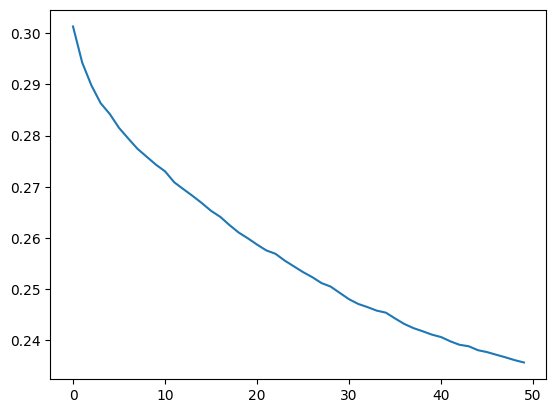

In [26]:
plt.plot(model_history.history['loss'])